In [31]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import cross_val_score

In [21]:
digits=sklearn.datasets.load_digits()

In [14]:
digits.target.shape

(1797,)

In [15]:
digits.data.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

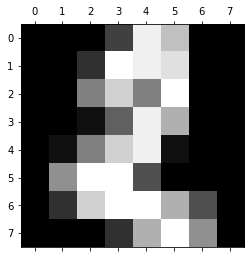

In [38]:
import matplotlib.pyplot as plt 
>>> plt.gray() 
>>> plt.matshow(digits.images[2]) 
>>> plt.show() 

In [30]:
X=digits.data
y=digits.target

In [41]:
from sklearn.tree import DecisionTreeClassifier as DTC
clf=DTC()
cvs_mean=cross_val_score(clf,X,y,cv=10).mean()
def write_answer_1(cvs_mean):
    with open("DTC_answer1.txt", "w") as fout:
        fout.write(str(cvs_mean))
write_answer_1(cvs_mean)

In [43]:
from sklearn.ensemble import BaggingClassifier  as BC
clf=BC(n_estimators=100)
cvs_mean=cross_val_score(clf,X,y,cv=10).mean()
def write_answer_2(cvs_mean):
    with open("DTC_answer2.txt", "w") as fout:
        fout.write(str(cvs_mean))
write_answer_2(cvs_mean)

In [49]:
sqrt_features=int(np.sqrt(X.shape[1]))
clf=BC(max_features=sqrt_features,n_estimators=100)
cvs_mean=cross_val_score(clf,X,y,cv=10).mean()
def write_answer_3(cvs_mean):
    with open("DTC_answer3.txt", "w") as fout:
        fout.write(str(cvs_mean))
write_answer_3(cvs_mean)

In [50]:
sqrt_features=int(np.sqrt(X.shape[1]))
estimator=DTC(max_features=sqrt_features)
clf=BC(estimator,n_estimators=100)
cvs_mean=cross_val_score(clf,X,y,cv=10).mean()
def write_answer_4(cvs_mean):
    with open("DTC_answer4.txt", "w") as fout:
        fout.write(str(cvs_mean))
write_answer_4(cvs_mean)

In [55]:
from sklearn.ensemble import RandomForestClassifier  as RFC
clf=RFC(max_features=sqrt_features,n_estimators=100)
cvs_mean=cross_val_score(clf,X,y,cv=10).mean()

In [67]:
def fit_estimator(estimator):
    return cross_val_score(estimator, X, y, cv=10).mean()

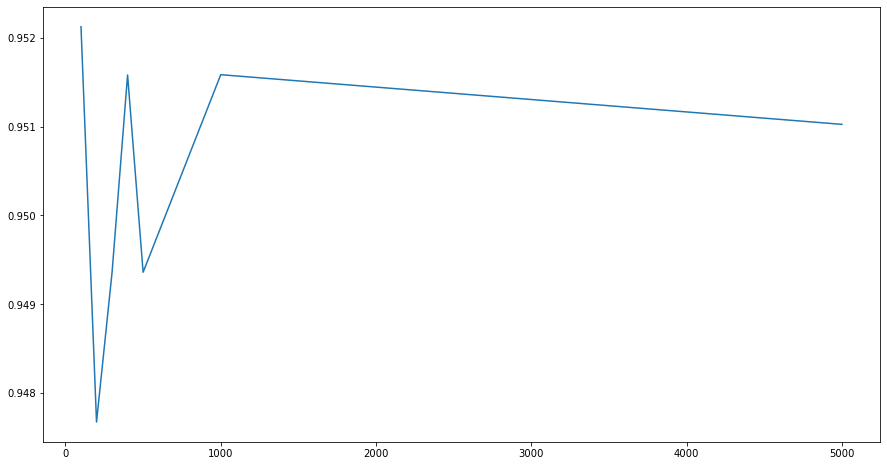

In [69]:
def plot_rf_trees_score():
    trees=[100,200,300,400,500,1000,5000]
    result=[]
    for tree in trees:
        clf=RFC(n_estimators=tree)
        result.append(fit_estimator(clf))
    plt.figure(figsize=(15, 8))
    plt.plot(trees, result)
    plt.show()
plot_rf_trees_score()

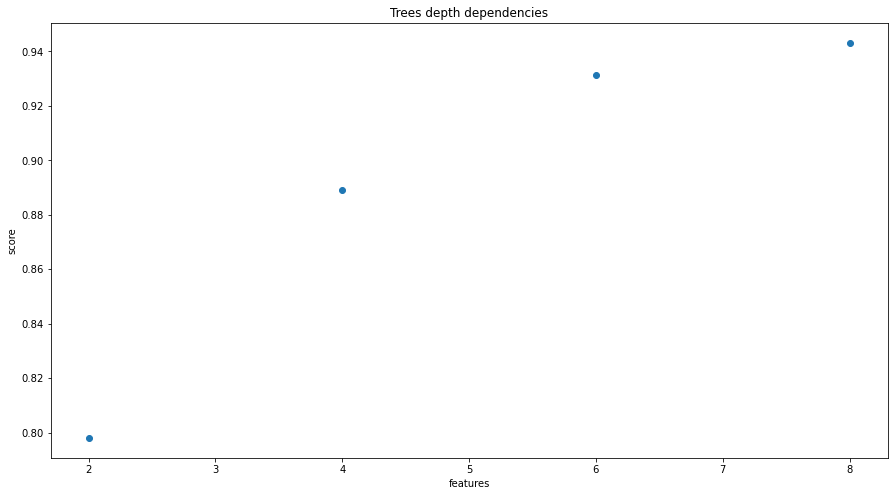

In [71]:
def plot_rf_tree_depth():
    d = X.shape[1]
    depth = [2, 4, 6, 8]
    results = []
    for d in depth:
        rf = RFC(n_estimators=400, random_state=101, max_depth=d)
        results.append(fit_estimator(rf))
    plt.figure(figsize=(15, 8))
    plt.plot(depth, results, 'o')
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees depth dependencies")
    plt.show()
plot_rf_tree_depth()

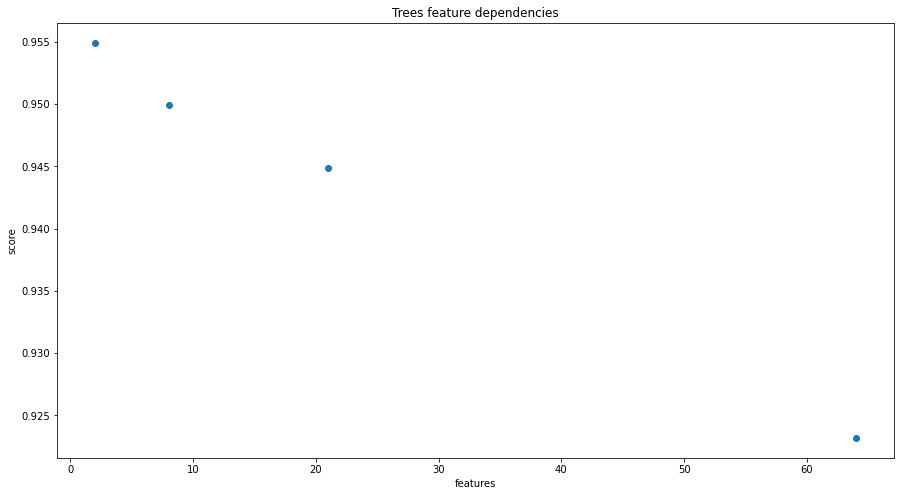

In [72]:
def plot_rf_trees_max_features():
    d = X.shape[1]
    features = [2, int(np.sqrt(d)), int(d/3), d]
    results = []
    for f in features:
        rf = RFC(n_estimators=400, random_state=101, max_features=f)
        results.append(fit_estimator(rf))
    plt.figure(figsize=(15, 8))
    plt.plot(features, results, 'o')
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees feature dependencies")
    plt.show()
plot_rf_trees_max_features() 

In [74]:
answers = '2 3 4 7'
def write_answer_5(cvs_mean):
    with open("DTC_answer5.txt", "w") as fout:
        fout.write(str(cvs_mean))
write_answer_5(answers)